In [ ]:
#Importing necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
url = "voice.csv"
data = pd.read_csv(url)

In [ ]:
# EDA
print(data.info())
print(data['label'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [ ]:

# Convert labels to numeric
data['label'] = data['label'].map({'male': 0, 'female': 1})

In [ ]:
# Split features and target
X = data.drop(columns=['label'])
y = data['label']


In [ ]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9842271293375394
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       337
           1       0.97      0.99      0.98       297

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [ ]:
# Feature Importance
importances = rf_model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

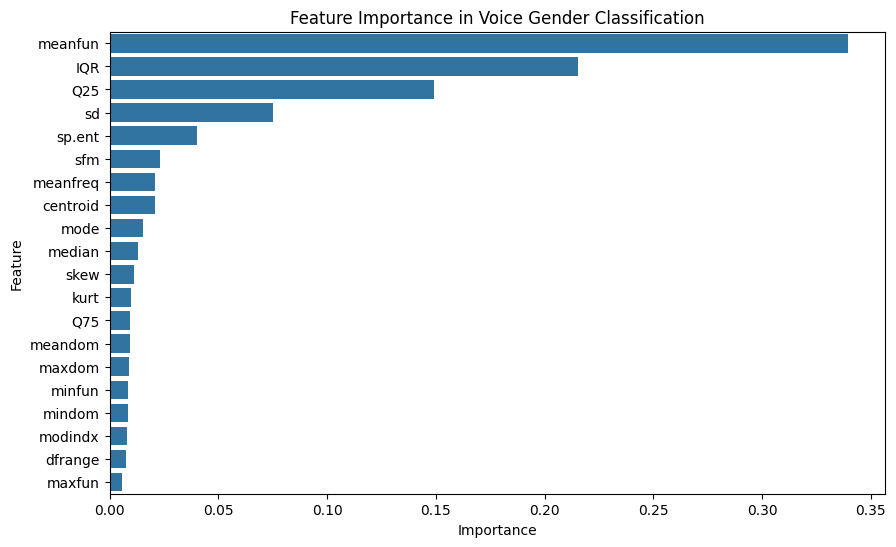

In [ ]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Voice Gender Classification')
plt.show()

In [11]:
from sklearn.svm import SVC

# Train SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_svm = svm_model.predict(X_test)
print("Support Vector Machine (SVM):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(classification_report(y_test, y_pred_svm))

Support Vector Machine (SVM):
Accuracy: 0.9826498422712934
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       337
           1       0.98      0.99      0.98       297

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [12]:
from xgboost import XGBClassifier

# Train XGBoost
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print(classification_report(y_test, y_pred_xgb))


XGBoost Classifier:
Accuracy: 0.9763406940063092
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       337
           1       0.96      0.99      0.98       297

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the MLP Model
mlp_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the Model
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model
mlp_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

# Predictions and Evaluation
y_pred_mlp = (mlp_model.predict(X_test) > 0.5).astype(int)
print("MLP Neural Network:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_mlp)}")
print(classification_report(y_test, y_pred_mlp))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5475 - loss: 0.6553 - val_accuracy: 0.9586 - val_loss: 0.2998
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9449 - loss: 0.2603 - val_accuracy: 0.9763 - val_loss: 0.1141
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9709 - loss: 0.1160 - val_accuracy: 0.9803 - val_loss: 0.0743
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9707 - loss: 0.0953 - val_accuracy: 0.9704 - val_loss: 0.0669
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9730 - loss: 0.0881 - val_accuracy: 0.9822 - val_loss: 0.0604
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9785 - loss: 0.0657 - val_accuracy: 0.9822 - val_loss: 0.0587
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9738 - loss: 0.0754 - val_accuracy: 0.9803 - val_loss: 0.0513
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9763 - loss: 0.0689 - val_accuracy: 0.9842 - val_loss: 0.0568
Epo

In [14]:
from sklearn.ensemble import VotingClassifier

# Combine Models in an Ensemble
voting_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('svm', svm_model),
    ('xgb', xgb_model)
], voting='hard')

# Train the Ensemble
voting_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_voting = voting_model.predict(X_test)
print("Voting Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_voting)}")
print(classification_report(y_test, y_pred_voting))


Voting Classifier:
Accuracy: 0.9826498422712934
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       337
           1       0.97      0.99      0.98       297

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



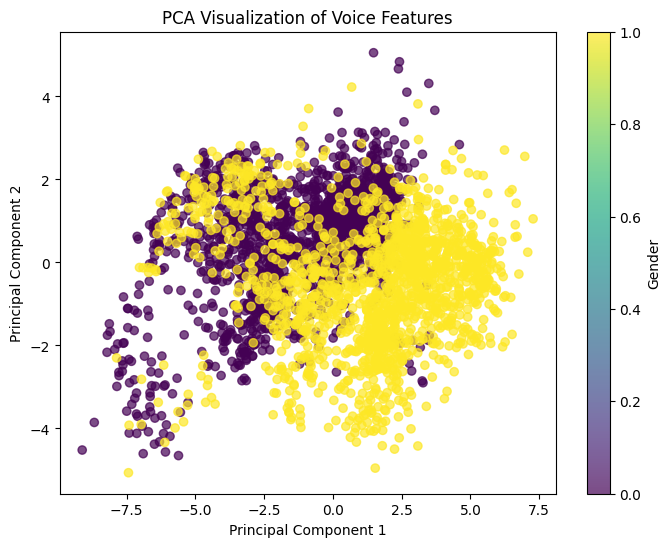

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize PCA components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(label='Gender')
plt.title("PCA Visualization of Voice Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()